In [1]:
import matplotlib
import pandas as pd
import aggregate_data, list_data, process_data
from hamilton import driver
from hamilton.execution import executors

/Users/elijahbenizzy/.pyenv/versions/3.9.10/envs/hamilton/lib/python3.9/site-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


In [2]:
%matplotlib inline

In [3]:
dr = driver.Builder(). \
        enable_dynamic_execution(allow_experimental_mode=True) \
        .with_remote_executor(executors.MultiThreadingExecutor(max_tasks=100)) \
        .with_local_executor(executors.SynchronousLocalTaskExecutor()) \
        .with_modules(aggregate_data, list_data, process_data) \
        .build()

Note: Hamilton collects completely anonymous data about usage. This will help us improve Hamilton over time. See https://github.com/dagworks-inc/hamilton#usage-analytics--data-privacy for details.


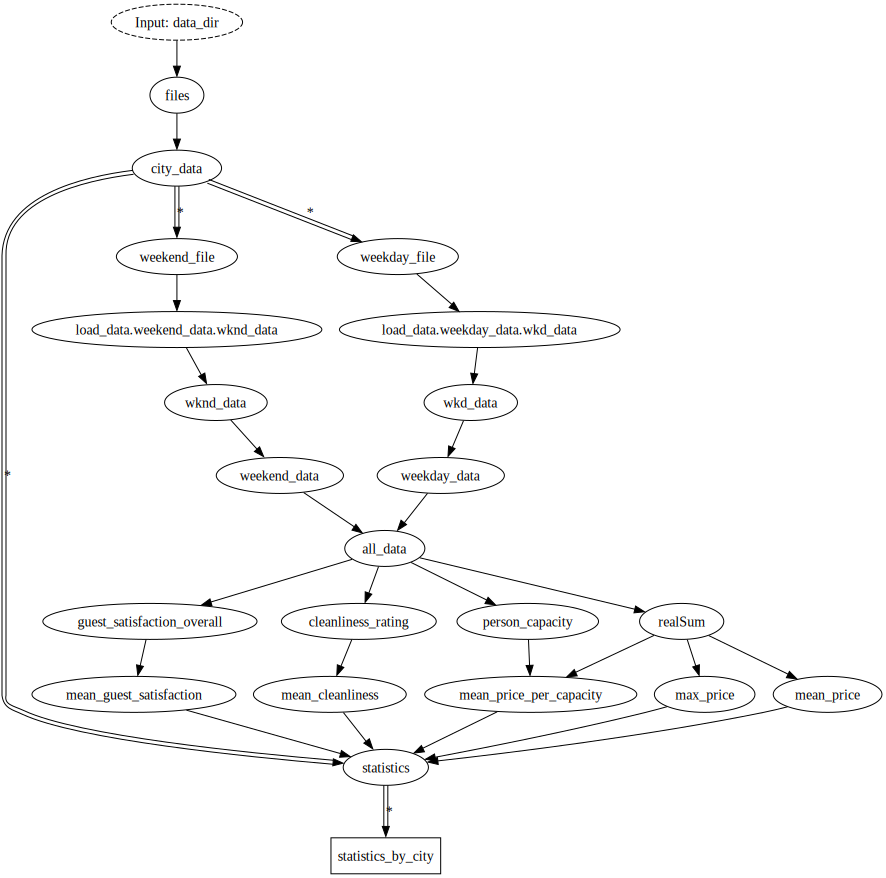

In [4]:
dr.visualize_execution(["statistics_by_city"], None, {}, inputs={"data_dir" : "data"})

In [5]:
df = dr.execute(["statistics_by_city"], inputs={"data_dir" : "data"})["statistics_by_city"]
df

,mean_guest_satisfaction,mean_price,mean_price_per_person,cleanliness_ratings_mean,max_price
city,,,,,
amsterdam,94.514423,573.112795,205.785928,9.465865,8130.668104
barcelona,91.109072,293.753706,112.139277,9.291564,6943.700980
rome,93.122300,205.391950,65.353404,9.514678,2418.348023
berlin,94.323671,244.583752,92.343819,9.461755,5857.483407
budapest,94.585281,176.513548,53.576879,9.477374,3751.233727
vienna,93.731128,241.582484,78.813444,9.472434,13664.305916
london,90.645652,362.469256,126.671510,9.175023,15499.894165
lisbon,91.093875,238.210479,75.274001,9.370640,1681.050657
athens,95.003598,151.744121,44.625864,9.638447,18545.450285


<Axes: title={'center': 'Guest satisfaction by city'}, xlabel='city'>

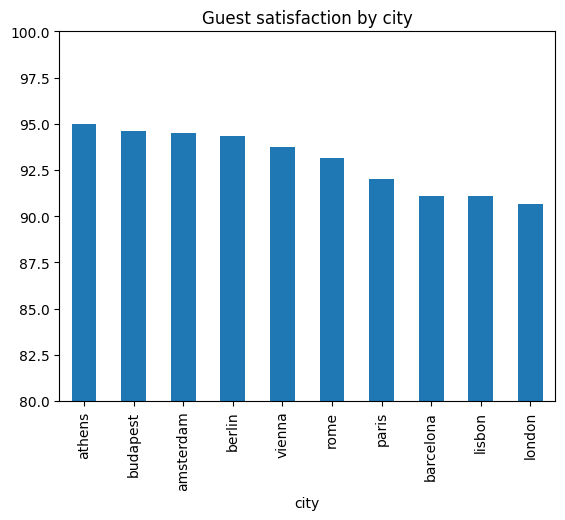

In [6]:
df["mean_guest_satisfaction"]\
    .sort_values(ascending=False)\
    .plot(kind="bar", title="Guest satisfaction by city", ylim=(80, 100))

<Axes: xlabel='city'>

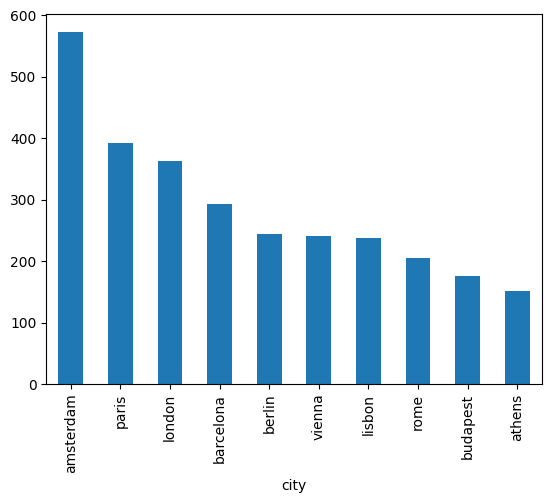

In [7]:
df["mean_price"]\
    .sort_values(ascending=False).plot(kind="bar")

<Axes: xlabel='city'>

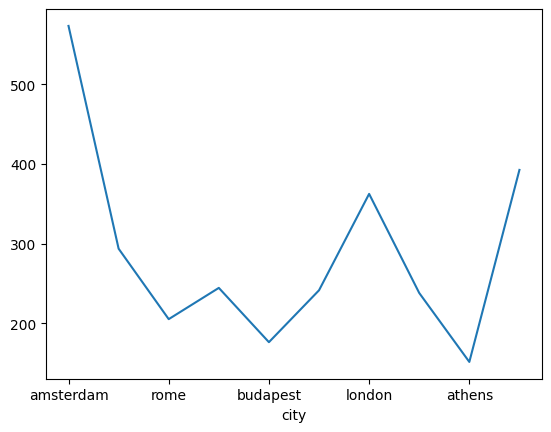

In [8]:
s = df["mean_price"]
s.plot()

<Axes: xlabel='city'>

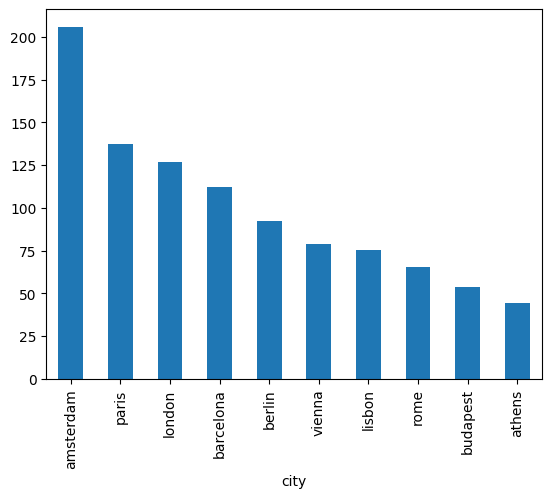

In [9]:
df["mean_price_per_person"]\
    .sort_values(ascending=False)\
    .plot(kind="bar")

<Axes: xlabel='city'>

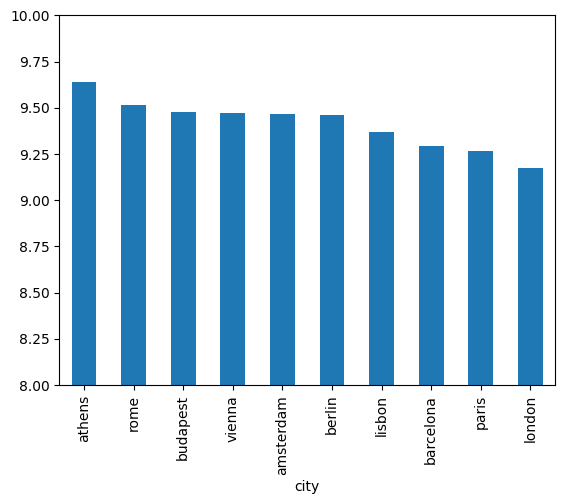

In [10]:
df["cleanliness_ratings_mean"]\
    .sort_values(ascending=False)\
    .plot(kind="bar", ylim=(8,10))